###**PROJECT:PROBLEM STATEMENT - PERSONAL LOAN CAMPAIGN MODELLING**

###**Data Description:**
####The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
 

###**Objective:**

###The classification goal is to predict the likelihood of a liability customer buying personal loans.

**Import Libraries**

In [65]:
import pandas as pd #Import differents librabries for our project
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

**Import Dataset**

In [66]:

#Import the dataset for our project
L_Data= pd.read_csv('Bank_Personal_Loan_Modelling.csv')
L_Data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


##**Univariate of the  Dataset**

In [67]:
#Columns of the dataset
L_Data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [68]:
#printing the shape of the dataset
L_Data.shape

(5000, 14)

In [69]:
#L_Data datatype
L_Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [70]:
#Printing the first five rows of the dataset
L_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
#Printing the last five rows of the dataset
L_Data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [72]:
#Printing out all the entries informations about the dataset
L_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [73]:
#Printing the statistical summary of the Dataset
L_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [74]:
#Average number of the dataset(mean)
(L_Data).mean().drop('ID')

Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

In [75]:
#Printing the average number of the dataset(median)

L_Data.median().drop('ID')

Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [76]:
#Average number of the mortgage
sum(L_Data['Mortgage'])/ len(L_Data['Mortgage'])

56.4988

In [77]:
#Average number by median
L_Data['Mortgage'].median()

0.0

In [78]:
#Printing out the datatypes of the dataset.
L_Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [79]:
#Printing the uniques values of all the columns
L_Data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###**We check for missing values in the dataset**

In [80]:
L_Data.isnull().any() #Here we check if there is a missing values in the datase.

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

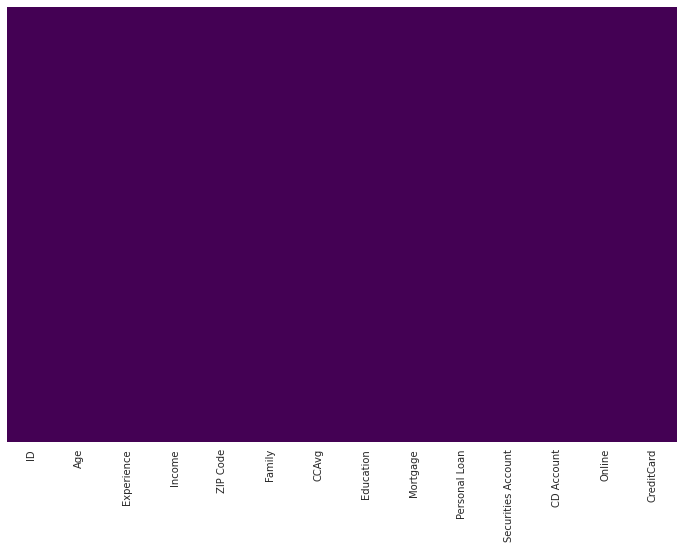

In [81]:
plt.figure(figsize = (12, 8))
sns.heatmap(L_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Checkingif we have any missing valaues in our dataset.

####Since we have a clean dataset, we proceed to data exploration

###**Exploration of the Dataset** 
####Before we start exploring our dataset, let's drop the ID column.

In [82]:
#Here we drop the ID column since we don't need it in our exploration
PL_Data= L_Data.drop('ID', axis=1)
PL_Data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


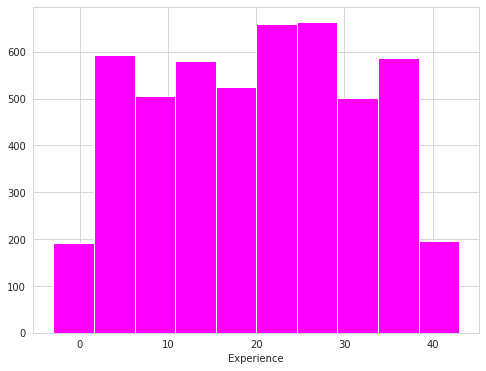

In [83]:
plt.figure(figsize=(8, 6))
plt.hist(L_Data['Experience'],
         color="magenta")
plt.xlabel('Experience');
#plt.ylabel('Probability Density');



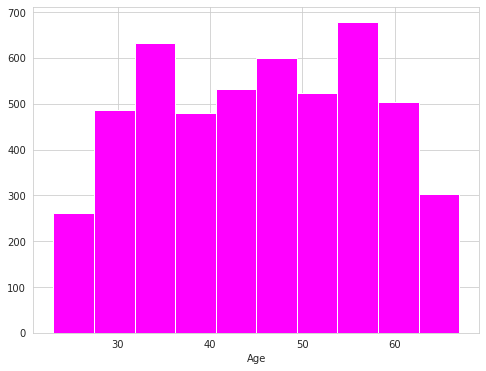

In [84]:
plt.figure(figsize = (8, 6))
plt.hist(L_Data['Age'], 
         color = "magenta")
plt.xlabel('Age');
#plt.ylabel('CreditCard');

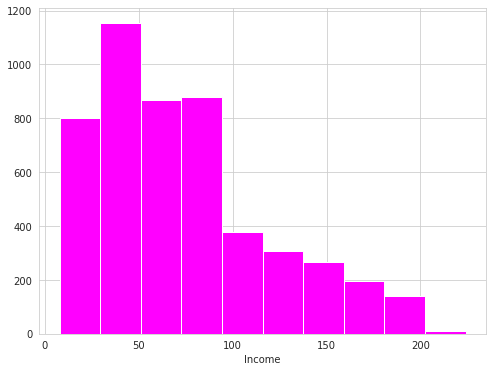

In [85]:
plt.figure(figsize = (8, 6))
plt.hist(L_Data['Income'], 
         color = "magenta")
plt.xlabel('Income');
#plt.ylabel('CreditCard');

In [86]:
(L_Data['Income']>100).sum()

1212

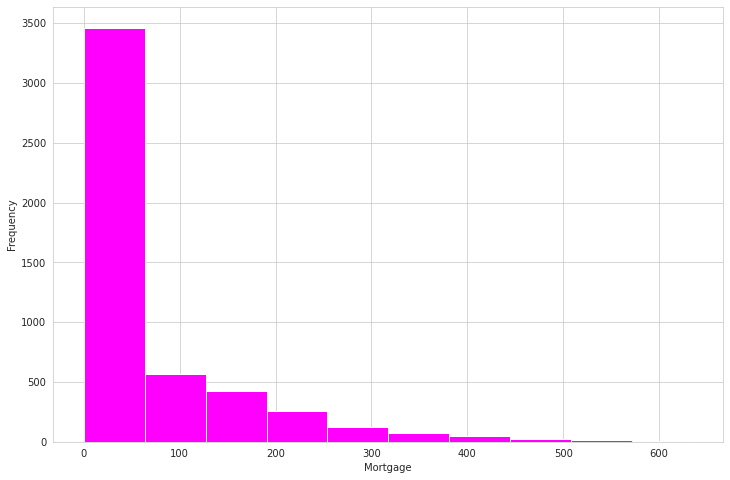

In [87]:
plt.figure(figsize = (12,8))
plt.hist(PL_Data['Mortgage'],
         color = 'magenta'), 
         
plt.xlabel('Mortgage')
plt.ylabel('Frequency');


###**Insight from the above distributions graph**

###From above distribution plots:
###(i)The experience plot shows that the data is not normally distributed and the average number of proffesional experience of customers is 20year.

###(ii)The age plots is not normally distibuted with the average number of 45year.  
###That's the average age of customers in the bank is 45year.

###(iii)For the Income plot, the graph skewed a bit to the right. And we can also see that the average income of many of the customers is between 0 and $100,000.
###Just a few number of customers has an annual income above 100,000. 

###(iv) The mortgage graph is positively skewed to the right. This because the average mortgage many customers collected from the bank is less 100,000 dollars.


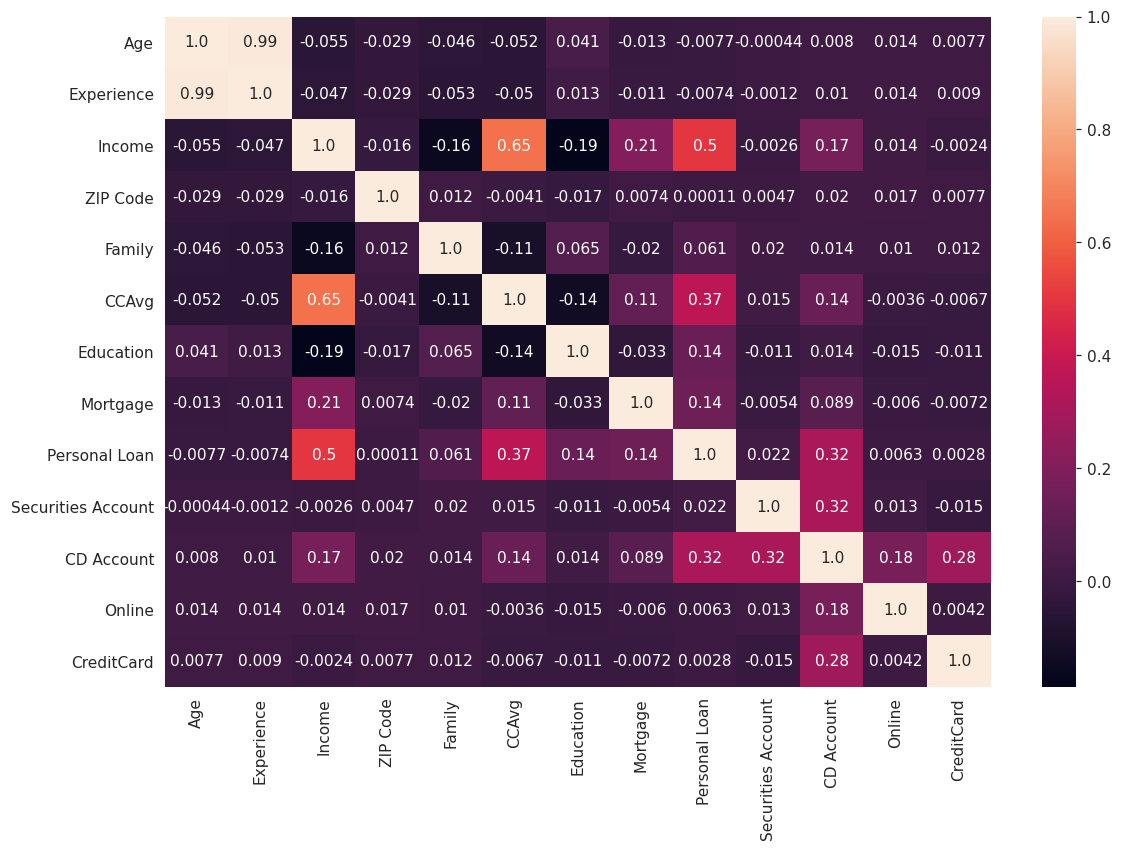

In [88]:
#Let's show the correlation table on the heatmap
plt.figure(figsize=(12,8), dpi=111)
sns.heatmap(PL_Data.corr(), annot=True, fmt='.2')

### The heatmap is showing the relations of the entire dataset. From the above we will see that age and the year of experience are highly positive correlated. And what this means is that, the years of proffessional experience of many customers depends on their age. 

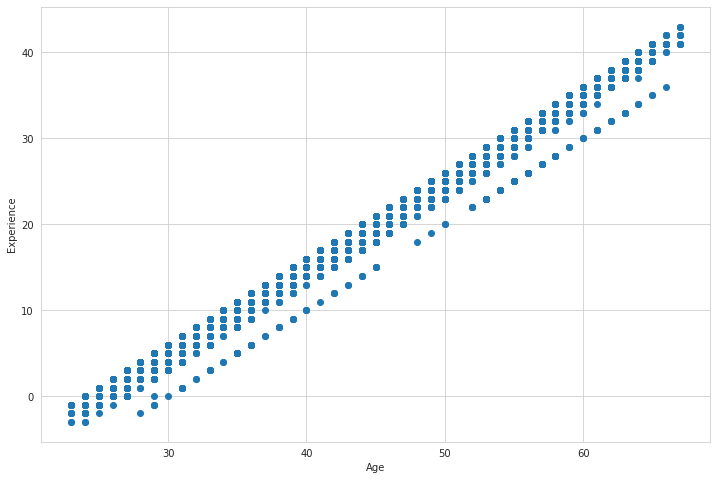

In [89]:
#Plot showing the relationship between age and customers year of experience.
plt.figure(figsize = (12, 8))
plt.scatter(PL_Data['Age'],PL_Data['Experience'])
plt.xlabel('Age')
plt.ylabel('Experience');

In [90]:
PL_Data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

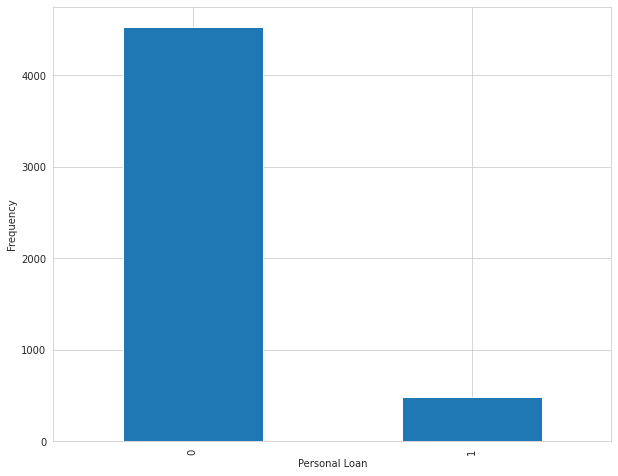

In [91]:
plt.figure(figsize=(10,8))
PL_Data['Personal Loan'].value_counts().plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency');

In [92]:
PL_Data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

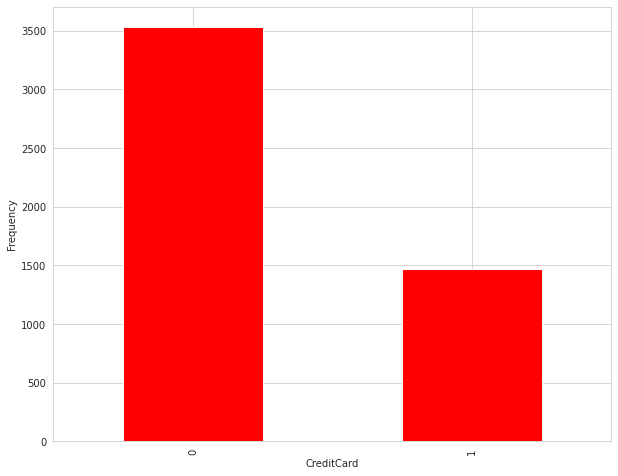

In [93]:
plt.figure(figsize=(10,8))
PL_Data['CreditCard'].value_counts().plot(kind= 'bar', color= 'r')
plt.xlabel('CreditCard')
plt.ylabel('Frequency');

In [94]:
PL_Data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

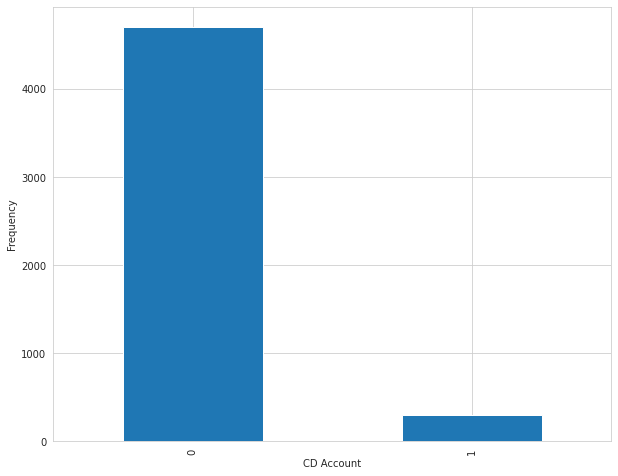

In [95]:
plt.figure(figsize=(10,8))
PL_Data['CD Account'].value_counts().plot(kind='bar')
plt.xlabel('CD Account')
plt.ylabel('Frequency');

In [96]:
PL_Data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

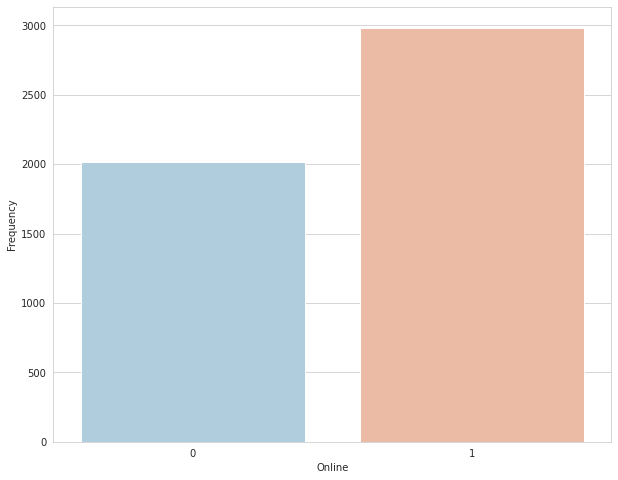

In [97]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='Online',data=PL_Data,palette='RdBu_r')
plt.xlabel('Online')
plt.ylabel('Frequency');

In [98]:
PL_Data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

Text(0, 0.5, 'Frequency')

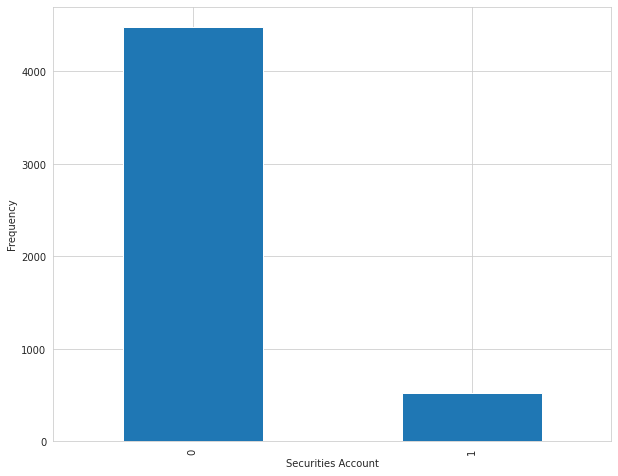

In [99]:
plt.figure(figsize=(10,8))
PL_Data['Securities Account'].value_counts().plot(kind='bar')
plt.xlabel('Securities Account')
plt.ylabel('Frequency')

###**Insight from the above dataset**

From the categorical daset plotted above, we can see that the number of customers that took the personal loan, Credit card, CD Account, Online banking and those that  do Online banking are minimum in number than those that donot take any of this things from the bank.

In [100]:
#Let's check the distribution of our target column.

PL_Data['Personal Loan'].value_counts()[0]

4520

In [101]:
#Let's check the percentage  of the customers that donot take the personal Loan in the last campaign.

PL_Data['Personal Loan'].value_counts()[0]/PL_Data['Personal Loan'].count()*100

90.4

In [102]:
#(PL_Data['Mortgage'] >600).value_counts()
PL_Data[PL_Data['Mortgage']>550]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
782,54,30,194,92056,3,6.0,3,587,1,1,1,1,1
1716,32,8,200,91330,2,6.5,1,565,0,0,0,1,0
1783,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
1789,44,20,171,91330,4,0.7,1,567,1,0,1,1,1
1937,51,25,181,95051,1,3.3,3,589,1,1,1,1,0
2541,34,8,171,90212,2,2.2,2,569,1,0,0,1,0
2769,33,9,183,91320,2,8.8,3,582,1,0,0,1,0
2841,37,11,190,94305,4,7.3,2,565,1,0,1,1,0
2934,37,13,195,91763,2,6.5,1,635,0,0,0,1,0


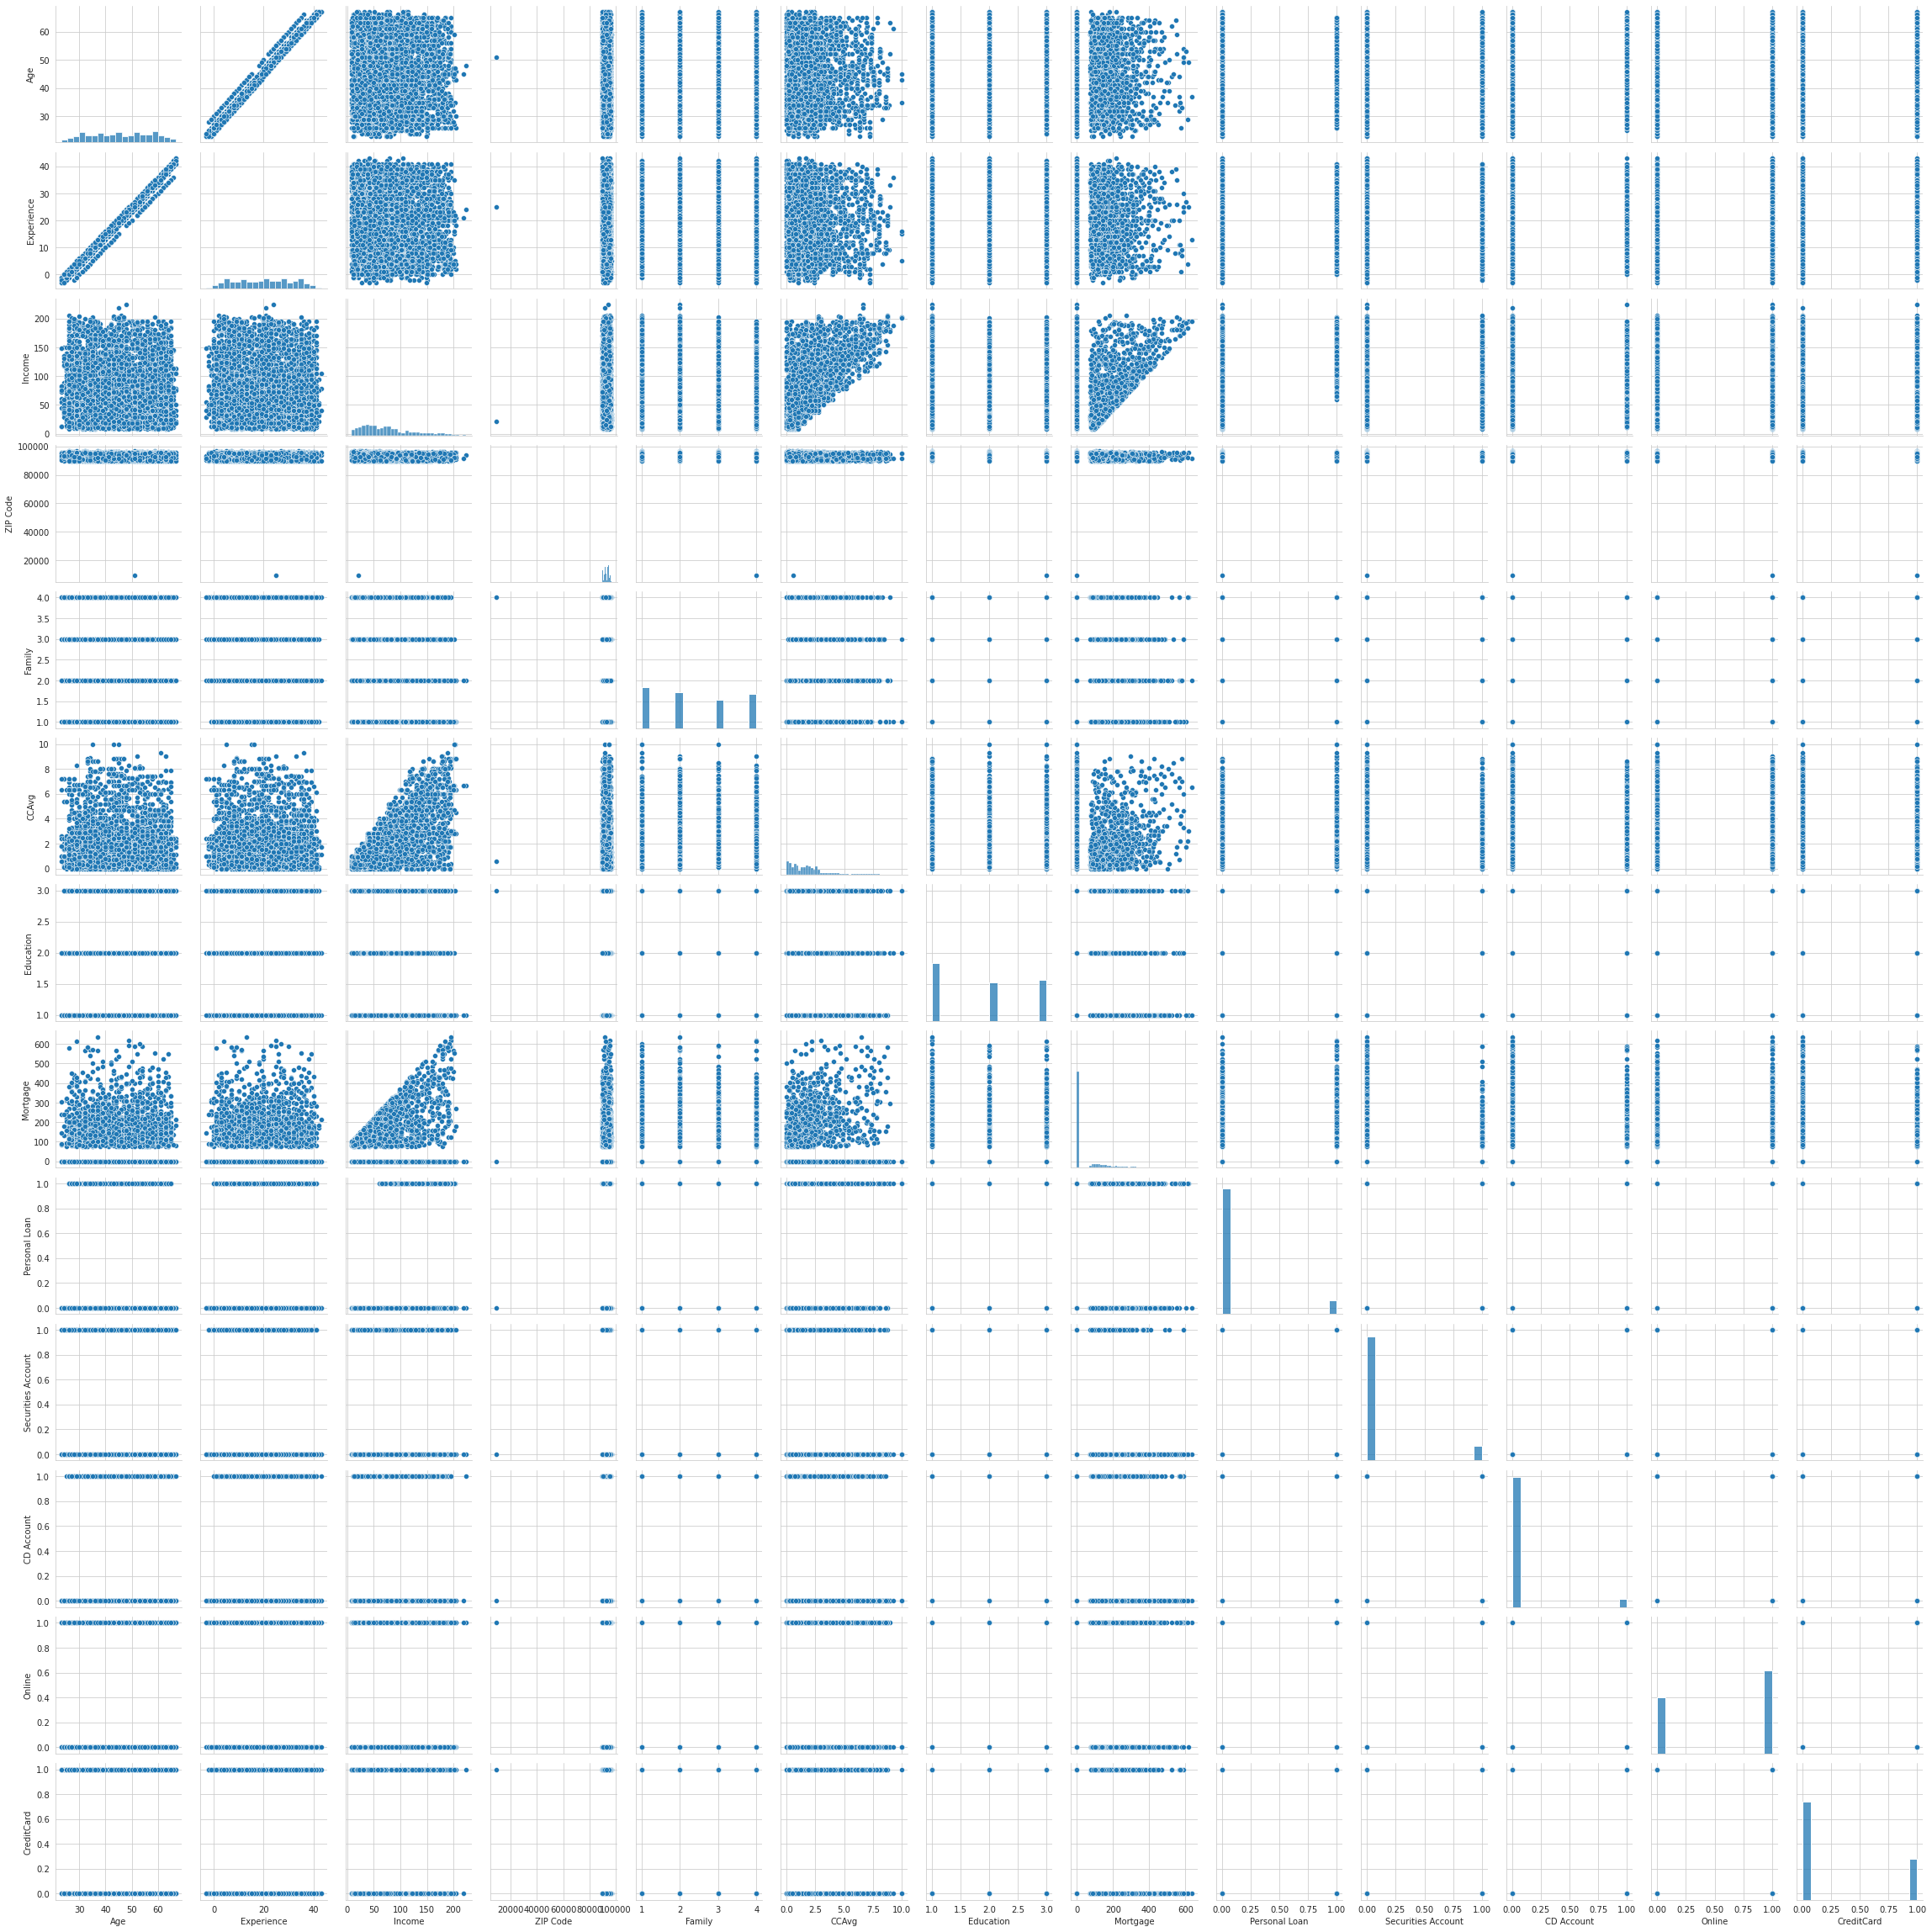

In [103]:
#Let's plot the distribution of the entire dataset with pairplot

sns.pairplot(PL_Data);

In [104]:
pd.crosstab(PL_Data['Personal Loan'],PL_Data['Education'])


Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


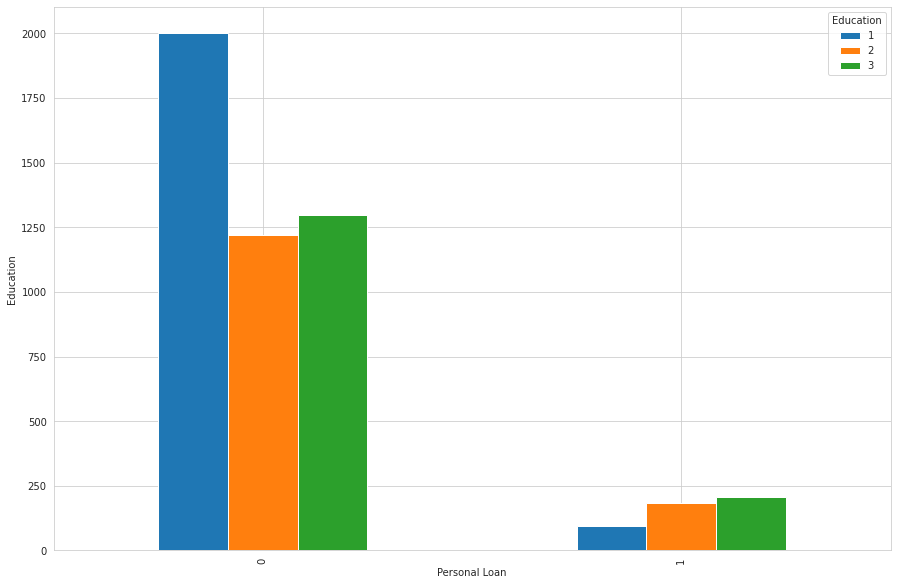

In [105]:
#plt.figure(figsize= (25, 20), dpi= 111)
pd.crosstab(PL_Data['Personal Loan'],PL_Data['Education']).plot(kind='bar', figsize= (15,10))
plt.xlabel('Personal Loan')
plt.ylabel('Education');

###Looking at this plot, we will see that, for the people that donot collect collect a personal loan from the bank, many of this customers are undergraduate. Many of the customers that took the loans are top proffesinals.

In [106]:
pd.crosstab(PL_Data['Personal Loan'],PL_Data['CreditCard'])

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


<Figure size 2775x2220 with 0 Axes>

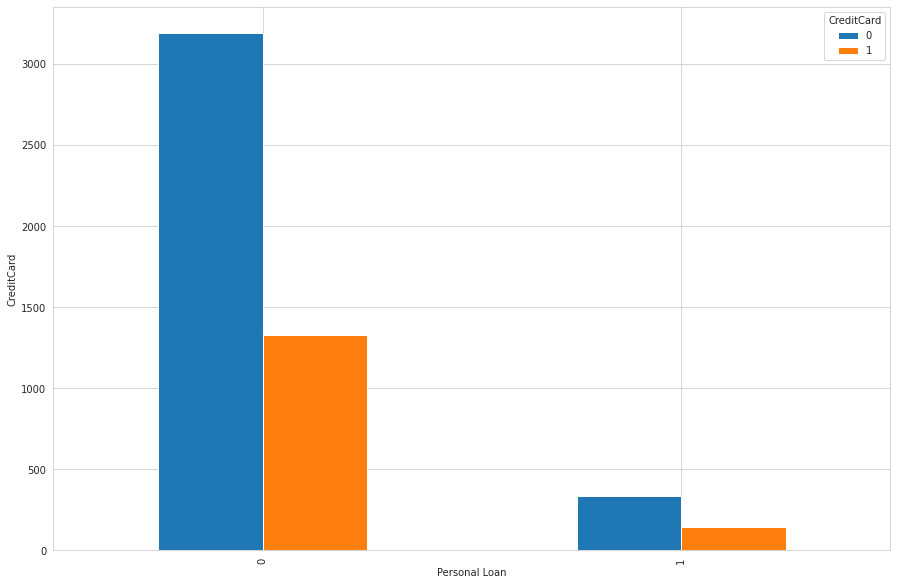

In [107]:
plt.figure(figsize= (25, 20), dpi= 111)
pd.crosstab(PL_Data['Personal Loan'],PL_Data['CreditCard']).plot(kind='bar', figsize= (15,10) )
plt.xlabel('Personal Loan')
plt.ylabel('CreditCard');

### This graph shows that many customers that donot take personal loan are customers with no creditcard and also the few customers that took the loan donot have the credit card also.

<Figure size 2775x2220 with 0 Axes>

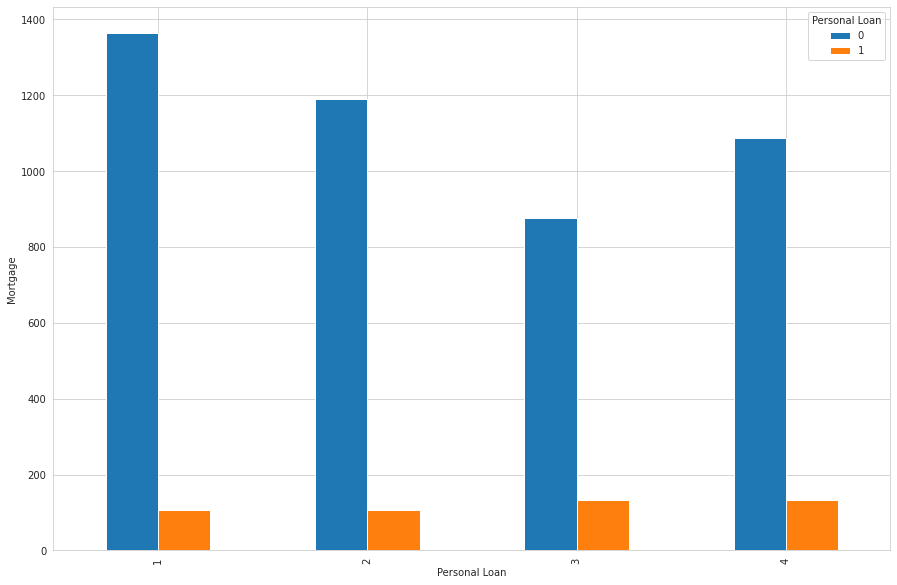

In [108]:
plt.figure(figsize= (25, 20), dpi= 111)
pd.crosstab(PL_Data['Family'],PL_Data['Personal Loan']).plot(kind='bar', figsize= (15,10))
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage');

###This graph shows that just few customers have that has a mortgage took the personal loan.

<Figure size 2775x2220 with 0 Axes>

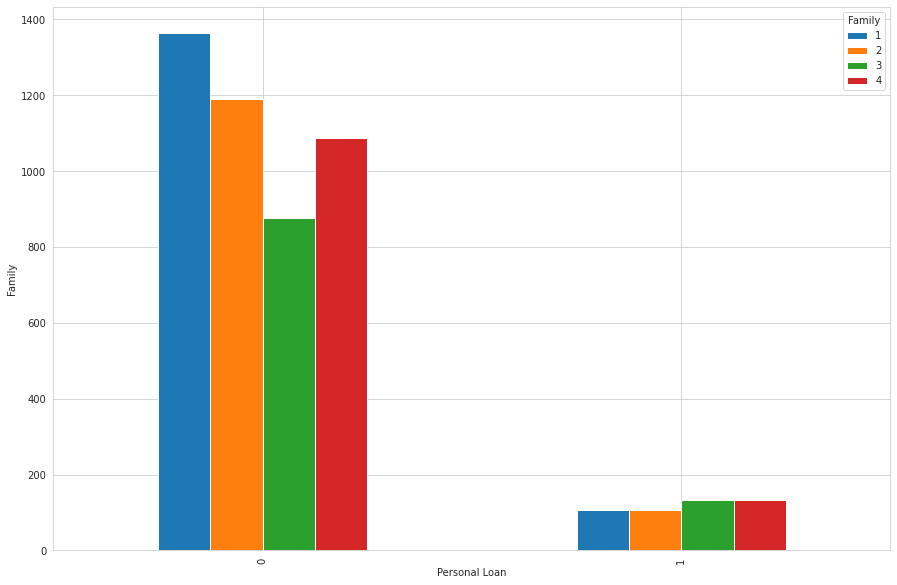

In [109]:
plt.figure(figsize= (25, 20), dpi= 111)
pd.crosstab(PL_Data['Personal Loan'],PL_Data['Family']).plot(kind='bar', figsize= (15,10))
plt.xlabel('Personal Loan')
plt.ylabel('Family');

###This above grahps shows that the family that took the personal loan are families of 3 and the family that donot take the personal loan are family of 1(probably single).

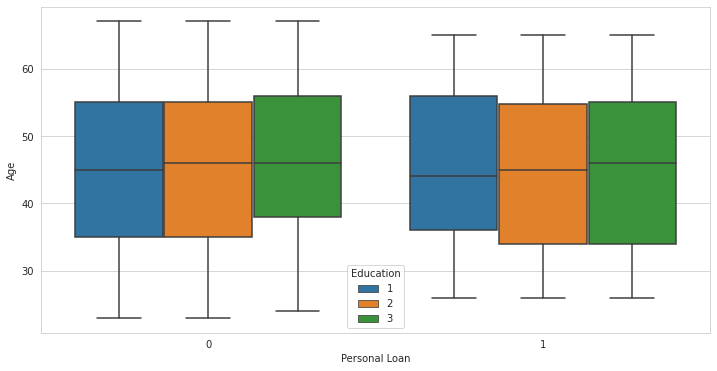

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Personal Loan',y='Age', data = PL_Data, hue='Education')

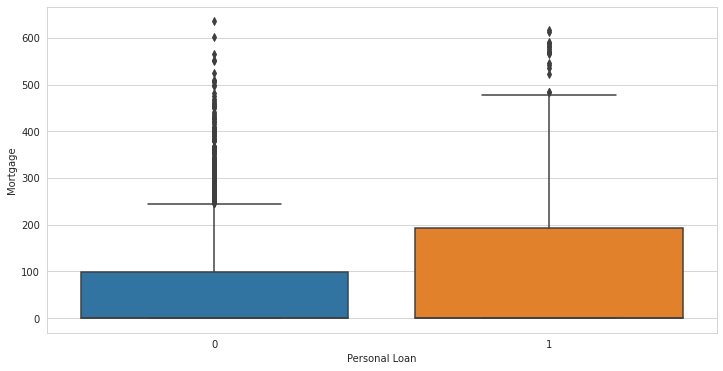

In [113]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Personal Loan',y='Mortgage', data = PL_Data)

# New section

In [114]:
PL_Data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [115]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
PL_Data.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


##**Splitting the dataset into test and training set**

In [116]:
#Now we separate X and y variable for 
X=PL_Data.drop('Personal Loan', axis= 1) #rain.drop('Cabin',axis=1,inplace=True)
y= PL_Data['Personal Loan']

In [117]:
X #Printing the value of X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [118]:
y #Printing the y 

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [119]:
#Create a dummy for our categorical dataset
X = pd.get_dummies(X, drop_first=True) 


In [120]:
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [121]:
#We slipt our data to X and y train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [122]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [123]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_predict = logmodel.predict(X_test)

In [124]:

y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.58      0.28      0.38       138

    accuracy                           0.92      1500
   macro avg       0.76      0.63      0.67      1500
weighted avg       0.90      0.92      0.90      1500



In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy_score(y_test, y_predict)

[[1334   28]
 [  99   39]]


0.9153333333333333

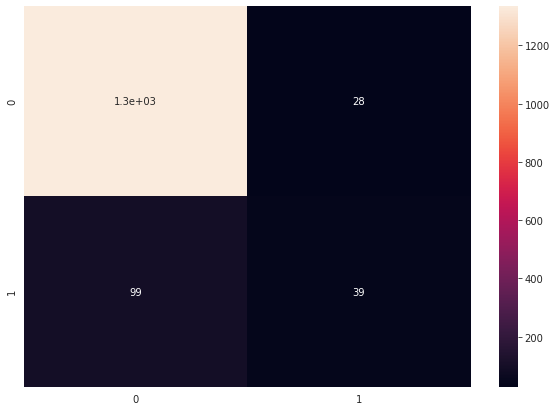

In [127]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.show()


**CONCLUSION**
#### This is a very good model, we got a strong percentage in the evalution. From the analysis above, we can see that those customers that doesn't takes the loan are an undergraduate and singles. Which means that targetting this set of customers to take a personal loan might not yield any result since many of the those customers has a littel  earning income.